# Let's Support the Support Vector Machine

Maths aside, here we will talk about the approach to take to plot the line (margin lines) in SVM.

I guess that you have understood the basic concept of what SVM is, but for the refresher, you also should checkout the StatQuest videos on explaining SVM in three parts. Because there are many jargons coverend in there like SVC vs SVM and so...

#### What I see...

    I look at SVM in Two parts.
    
    1) Simple SVM in which the data has linear relationship. It is where we do not need to convert
       the data in the other dimentions.
    
    2) Degreed SVM in which all other jargons like 'Kernel transformation' or 'Kernel Trick' comes
       into the picture. It is where we need to transform the data in the other dimention to get to
       know how the data is seperated.

## So what is SVM?

**My understandings go like this:**  
We have two classifiers till now, 1. Baysian Classifier and 2. SVM.

The main difference is that, the Baysian Classifier is a type of `Generative Classifier`. It genereates the class for the upcoming data. Here by generate means that, it checks the feature and calculates the class. So here is the caclulation part.

While, the SVM is the `Discreminative Classifier`, in which it uses the terms like "if the point lies in this region, then you
the point is from that class else other". Simple. *Take it, or leave it*.

> ## "Don't try to remember things, they will come at your fingertips as you practice. *For now - Catch the `C`.*

# 

## Type 1 - SVM: Simple one

In [1]:
# Making data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
sns.set();

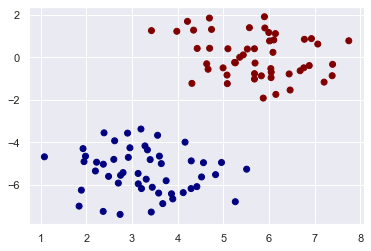

In [106]:
features, lables = make_blobs(n_samples= 100, n_features= 2, centers= 2, cluster_std= 1)
plt.scatter(features[:, 0], features[:, 1], c= lables, cmap= 'jet')

In [17]:
# Getting help from SVM to solve the classification

from sklearn.svm import SVC

In [5]:
model = SVC(C= 1E10, kernel= 'linear')

In [6]:
model

SVC(C=10000000000.0, kernel='linear')

In [107]:
model.fit(features, lables)

SVC(C=10000000000.0, kernel='linear')

Now, our model is ready with its lines and other supporters.  
Now, we are just visualizing them...

In [108]:
sp = model.support_vectors_
sp

array([[ 3.19620884, -3.36747641],
       [ 4.31296002, -1.22146301]])

### See where are those...

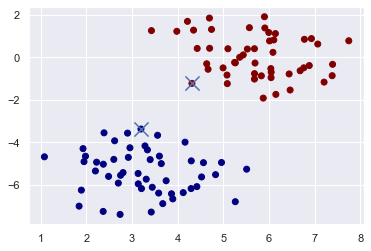

In [109]:
plt.scatter(features[:,0], features[:,1], c= lables, cmap= 'jet')
plt.scatter(sp[:, 0], sp[:, 1], marker= 'x', s= 200)

### How is meshgrid...? 

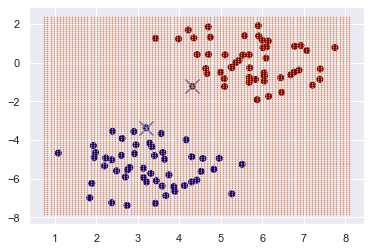

In [117]:
ax = plt.axes()

ax.scatter(features[:,0], features[:,1], c= lables, cmap= 'jet')
ax.scatter(sp[:, 0], sp[:, 1], marker= 'x', s= 200)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

x = np.linspace(xlim[0], xlim[1], 100)
y = np.linspace(ylim[0], ylim[1], 100)

XX, YY = np.meshgrid(x, y)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

ax.scatter(xy[:,0] ,xy[:,1], marker= '.', s= 1)

In [125]:
X.shape

(100, 2)

In [126]:
y.shape

(100,)

In [133]:
p = model.decision_function(xy).reshape(XX.shape)
p

array([[-5.21912534, -5.19083788, -5.16255041, ..., -2.4752413 ,
        -2.44695384, -2.41866637],
       [-5.14341134, -5.11512387, -5.08683641, ..., -2.3995273 ,
        -2.37123983, -2.34295237],
       [-5.06769733, -5.03940987, -5.0111224 , ..., -2.32381329,
        -2.29552583, -2.26723836],
       ...,
       [ 2.12513316,  2.15342063,  2.18170809, ...,  4.8690172 ,
         4.89730467,  4.92559213],
       [ 2.20084717,  2.22913463,  2.2574221 , ...,  4.94473121,
         4.97301867,  5.00130614],
       [ 2.27656117,  2.30484864,  2.3331361 , ...,  5.02044521,
         5.04873268,  5.07702014]])

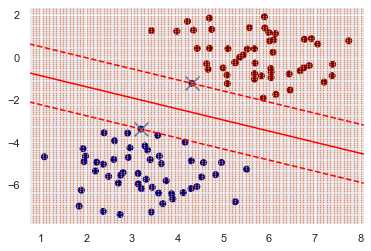

In [142]:
ax = plt.axes()

ax.scatter(features[:,0], features[:,1], c= lables, cmap= 'jet')
ax.scatter(sp[:, 0], sp[:, 1], marker= 'x', s= 200)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

x = np.linspace(xlim[0], xlim[1], 100)
y = np.linspace(ylim[0], ylim[1], 100)

XX, YY = np.meshgrid(x, y)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

ax.scatter(xy[:,0] ,xy[:,1], marker= '.', s= 1)

p = model.decision_function(xy).reshape(XX.shape) # The magic.
ax.contour(XX, YY, p, levels= [-1, 0, 1], colors= 'red', linestyles= ['--', '-', '--'])

### Just removed the mesh...

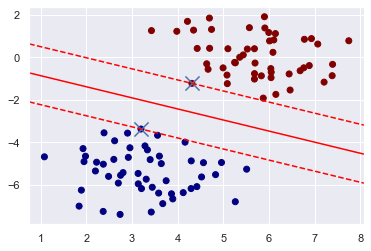

In [143]:
ax = plt.axes()

ax.scatter(features[:,0], features[:,1], c= lables, cmap= 'jet')
ax.scatter(sp[:, 0], sp[:, 1], marker= 'x', s= 200)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

x = np.linspace(xlim[0], xlim[1], 100)
y = np.linspace(ylim[0], ylim[1], 100)

XX, YY = np.meshgrid(x, y)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

p = model.decision_function(xy).reshape(XX.shape) # Still mystirious
ax.contour(XX, YY, p, levels= [-1, 0, 1], colors= 'red', linestyles= ['--', '-', '--'])